# 6-4-Networks-R
Jakke Neiro$^1$
1. Aboobaker laboratory, Department of Zoology, University of Oxford

# 1. Introduction

# 2. General TF network

In [1]:
nodes = read.csv("/hydra/TF_data/vertices_grn_tf_bound2021.csv")
links = read.csv("/hydra/TF_data/edges_grn_tf_bound2021.csv")

In [2]:
nodes = subset(nodes, nodes$X1.prop > 1/3)
links = subset(links, (links$Node1 %in% nodes$Nodes)|(links$Node1 %in% nodes$Nodes))

In [3]:
nrow(nodes)

[1] 109

In [4]:
nrow(links)

[1] 502

In [15]:
library('igraph')
net = graph_from_data_frame(d=links, vertices=nodes) 
#net = simplify(net, edge.attr.comb=list(Weight="sum","ignore"))

In [16]:
library(dichromat)
colfunc <- colorRampPalette(c("white", "orange"))
color_df = data.frame(color = colfunc(101), value=seq(0,1,0.01))

In [252]:
values = V(net)$X1.prop
ii <- cut(values, breaks = seq(min(values), max(values), len = 100), 
          include.lowest = TRUE)
## Use bin indices, ii, to select color from vector of n-1 equally spaced colors
colors <- colorRampPalette(c("white", "darkorange1"))(99)[ii]
V(net)$color = colors

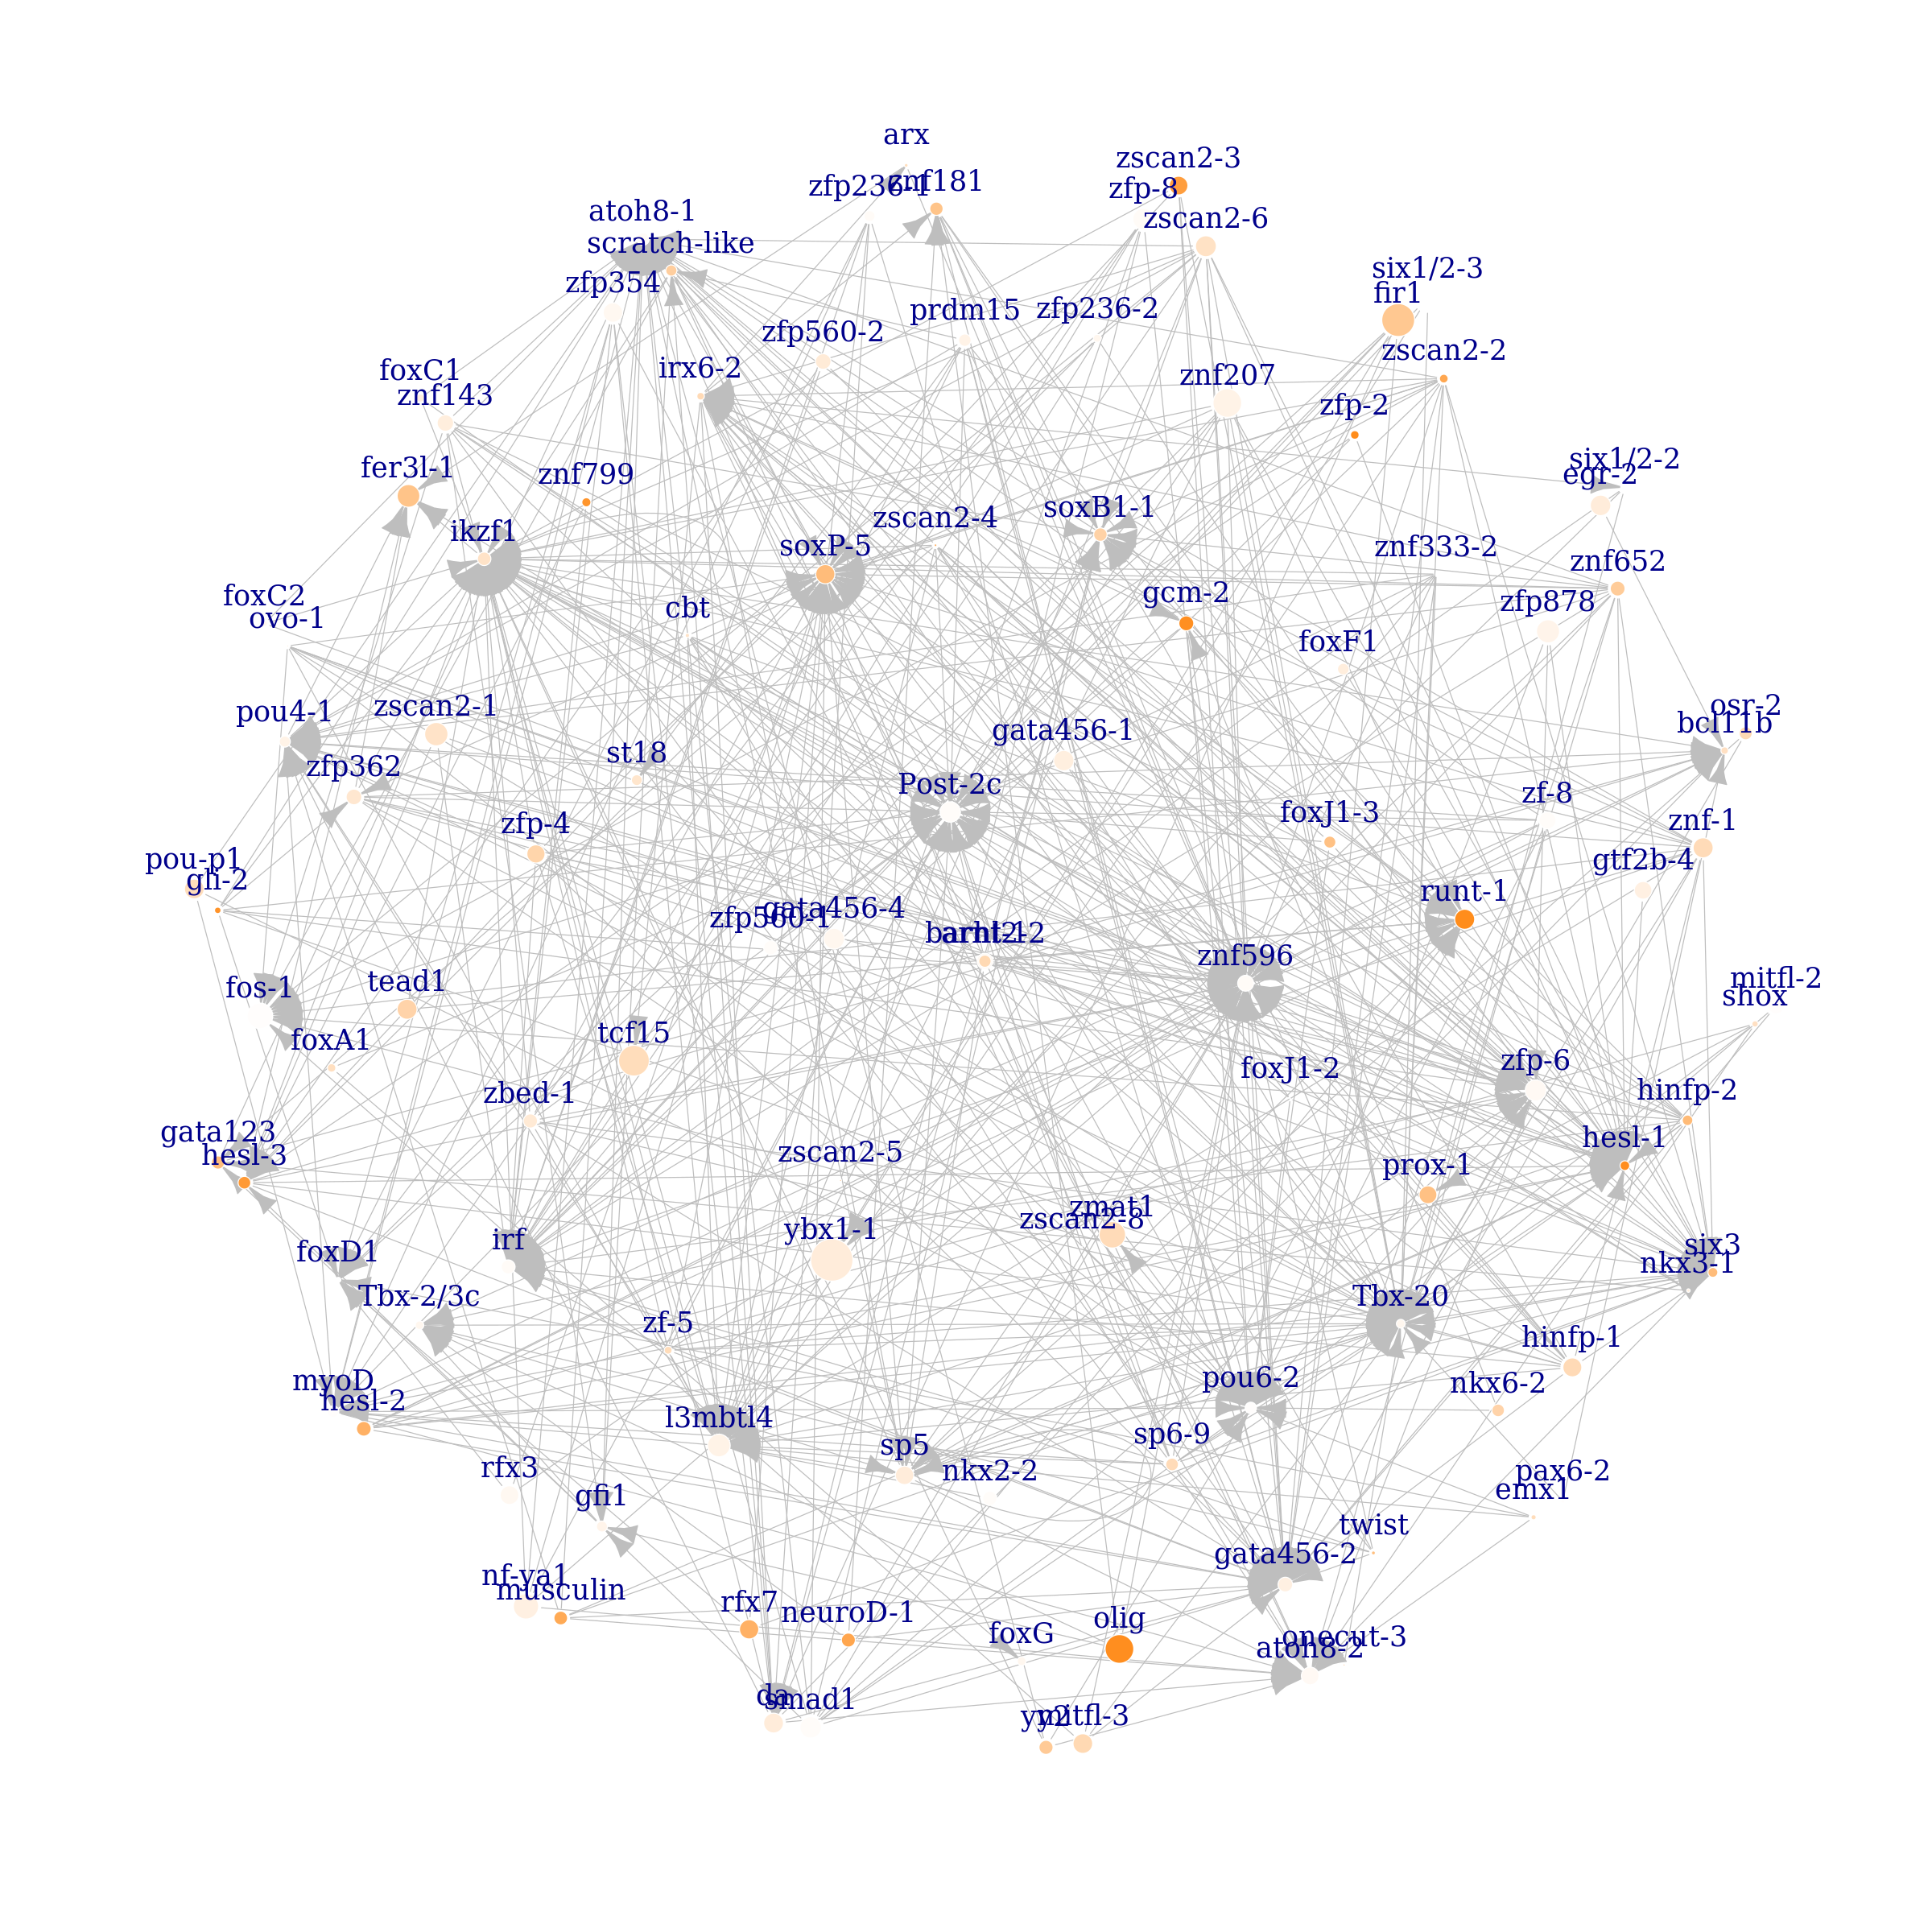

In [253]:
options(repr.plot.width = 20, repr.plot.height = 20)
V(net)$size = log(V(net)$X1+1)*0.75
V(net)$label = V(net)$Name
#V(net)$label.color = V(net)$labelcolor
#E(net)$arrow.mode = 0
E(net)$arrow.size= 0.4
E(net)$width = 1
l <- layout.sphere
plot(net, layout=l, vertex.label.cex=1.75,  
    edge.color = "grey", vertex.frame.color="white", vertex.label.dist=0.5, vertex.label.degree=-pi/2)

# 3. FSTF network

In [12]:
library('igraph')

In [1]:
nodes = read.csv("/drives/raid/AboobakerLab/jakke/TF_data/vertices_grn_neospec_bound2021.csv")
links = read.csv("/drives/raid/AboobakerLab/jakke/TF_data/edges_grn_neospec_bound2021.csv")

In [2]:
tf_names = read.csv("/drives/raid/AboobakerLab/jakke/enhancer_regions/enhancer_specneoblast_counts_aug2021.csv")
tf_prop = read.csv("/drives/raid/AboobakerLab/jakke/TF_data/Transcription_factors_01072021_values.csv")

In [3]:
names = subset(tf_prop, tf_prop$Symbol %in% tf_names$Name)$Neiro

In [4]:
nodes = subset(nodes, nodes$Nodes %in% names)
links = subset(links, (links$Node1 %in% nodes$Nodes)&(links$Node2 %in% nodes$Nodes))

In [5]:
nodes$Name

[1] "nkx6-1"       "ovo-1"        "neuroD-1"     "fli-1"        "six1/2-1"    
 [6] "hnf4"         "six3"         "coe"          "klf-1"        "sp6-9"       
[11] "foxF1 "       "foxQ/D"       "soxB1-1"      "nkx2l-2"      "nkx2-2"      
[16] "Prep"         "foxA1"        "pou4-1"       "myoD"         "ap2"         
[21] "gata456-2"    "scratch-like" "pax3/7-1"     "lhx2-1"       "nkx1-1"      
[26] "soxP-5"       "otx-1"        "pitx"         "prox-1"       "pou2/3-1"    
[31] "p53"          "foxD1"        "lhx3"         "pax6-1"       "pax6-2"

In [6]:
neospec = read.csv("/drives/raid/AboobakerLab/jakke/enhancer_regions/enhancer_specneoblast_counts_aug2021.csv")

In [7]:
label_colors = c()
for (i in 1:nrow(nodes)){
    class = subset(neospec, neospec$Name == nodes$Name[i])$Class[1]
    if (class == "neural"){
        label_colors = c(label_colors, "navyblue")
    }
    if (class == "epidermis"){
        label_colors = c(label_colors, "darkgreen")
    }
    if (class == "muscle"){
        label_colors = c(label_colors, "red4")
    }
    if (class == "protonephridia"){
        label_colors = c(label_colors, "orange")
    }
    if (class == "pole"){
        label_colors = c(label_colors, "grey")
    }
    if (class == "intestine"){
        label_colors = c(label_colors, "black")
    }
    if (class == "pharynx"){
        label_colors = c(label_colors, "goldenrod2")
    }
} 

In [8]:
subset(neospec, neospec$Name == nodes$Name[i])$Class[1]

[1] "neural"

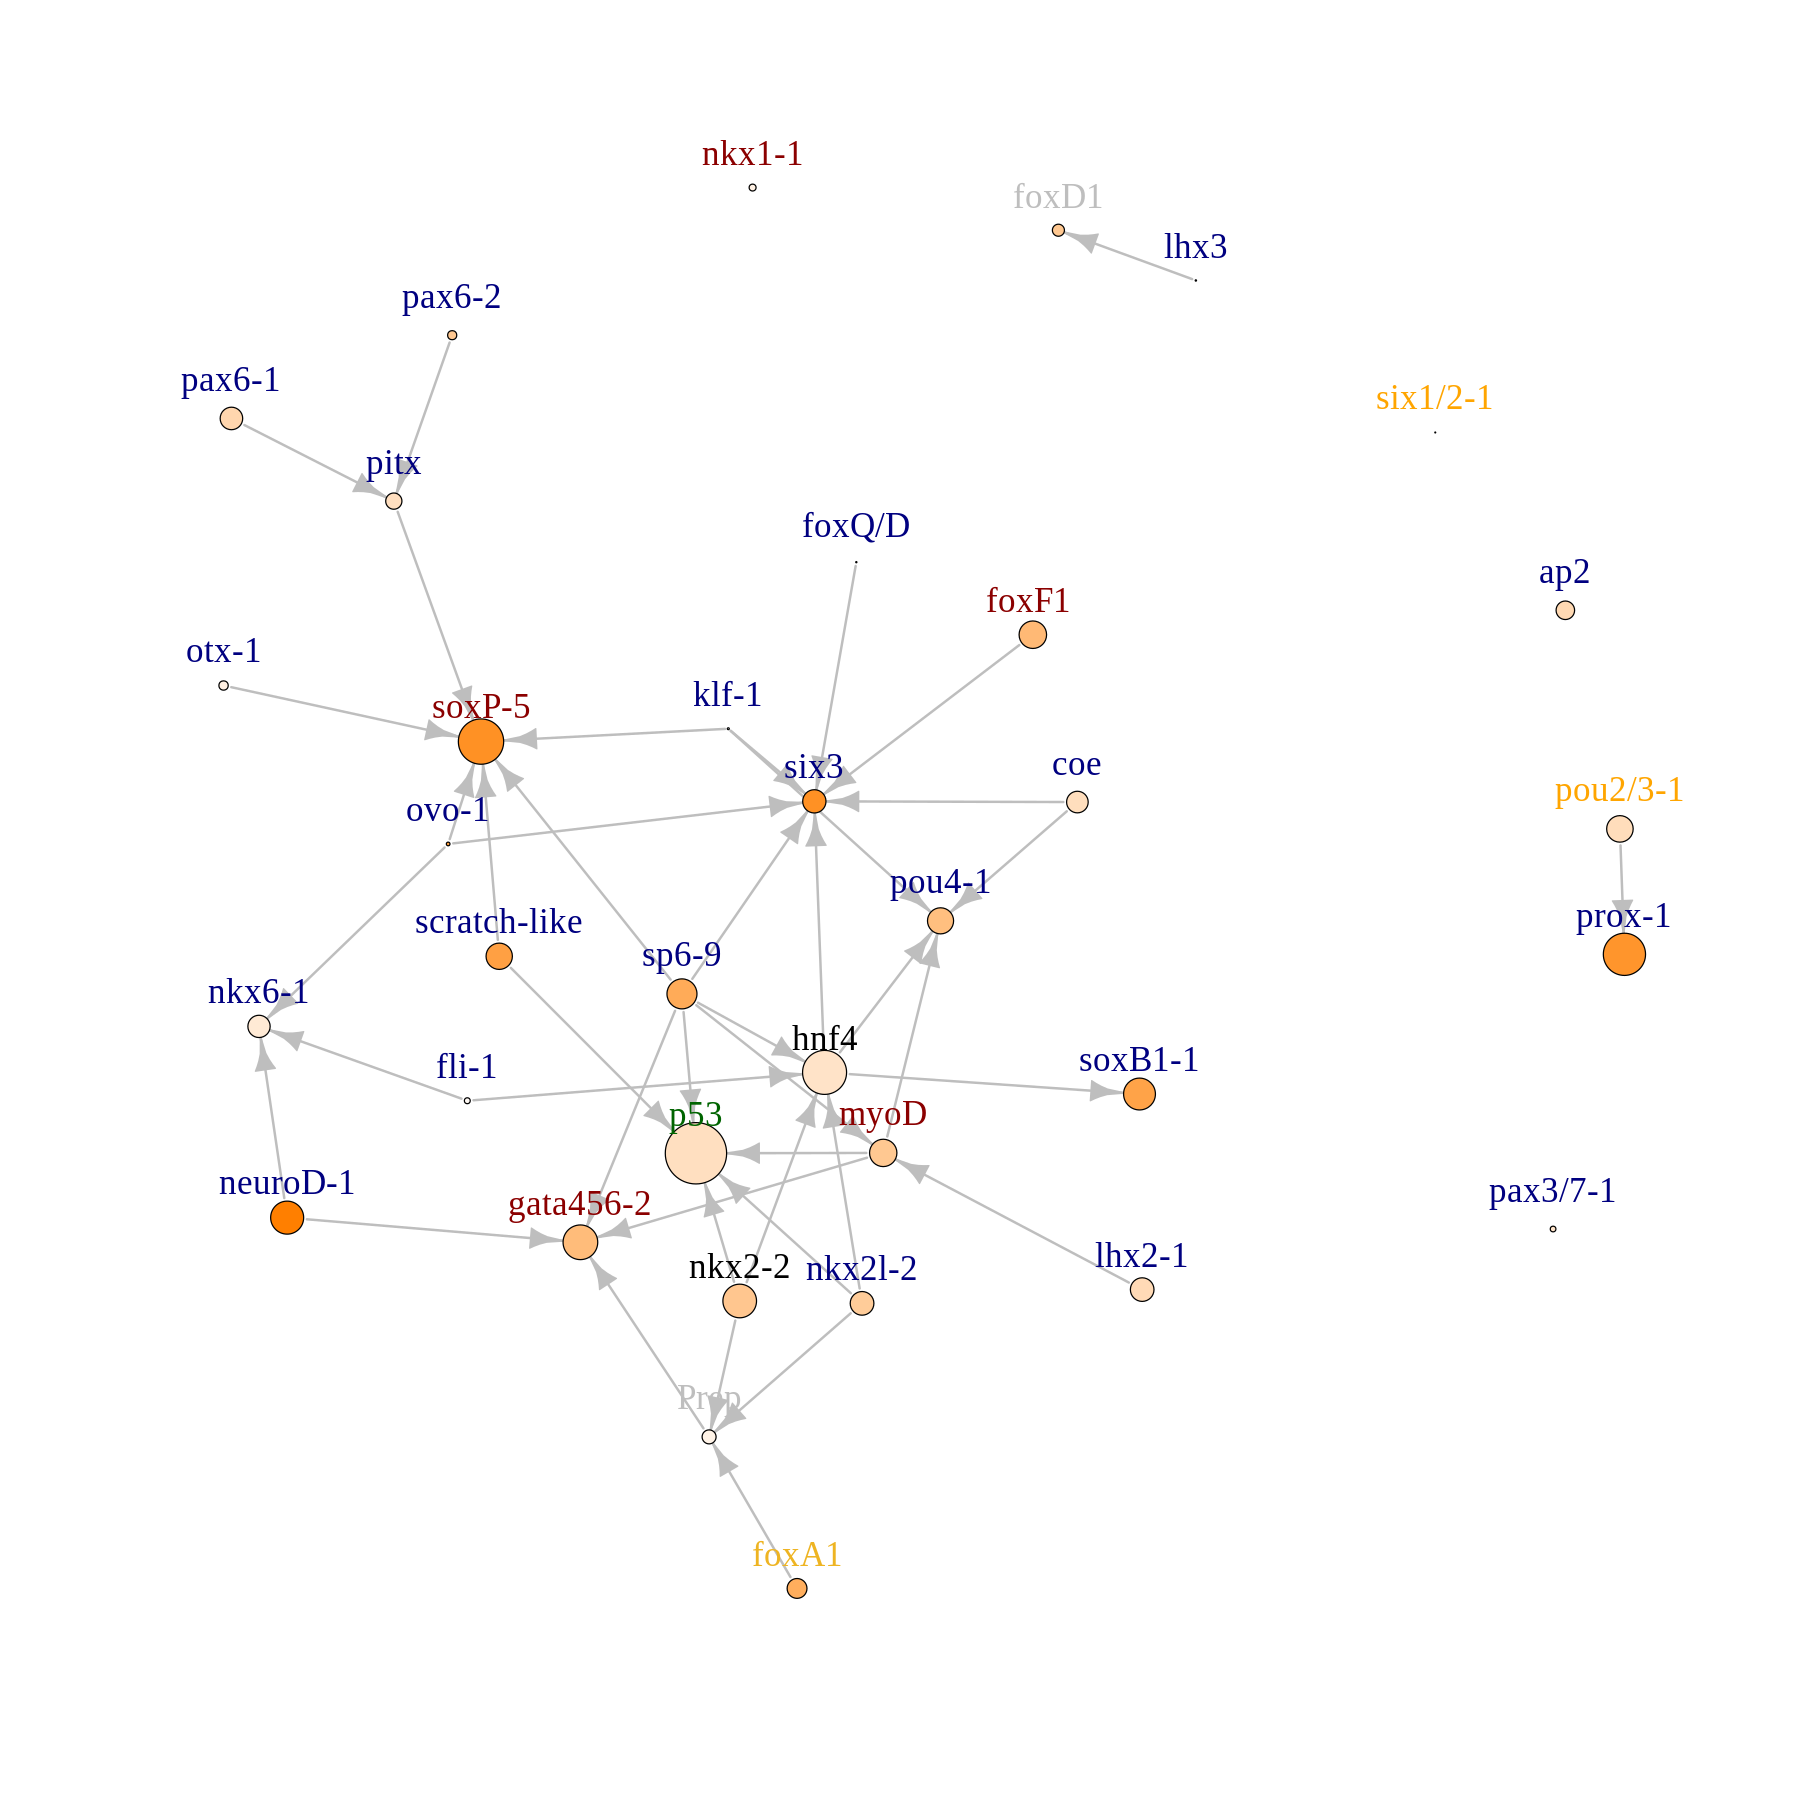

In [24]:
library('igraph')
net = graph_from_data_frame(d=links, vertices=nodes) 
#net = simplify(net, edge.attr.comb=list(Weight="sum","ignore"))
library(dichromat)
colfunc <- colorRampPalette(c("white", "orange"))
color_df = data.frame(color = colfunc(101), value=seq(0,1,0.01))
values = V(net)$X1.prop
ii <- cut(values, breaks = seq(min(values), max(values), len = 100), 
          include.lowest = TRUE)
## Use bin indices, ii, to select color from vector of n-1 equally spaced colors
colors <- colorRampPalette(c("white", "darkorange1"))(99)[ii]
V(net)$color = colors
options(repr.plot.width = 15, repr.plot.height = 15)
V(net)$size = log(V(net)$X1+1)*2
V(net)$label = V(net)$Name
#V(net)$label.color = V(net)$labelcolor
#E(net)$arrow.mode = 0
E(net)$arrow.size= 0.5
E(net)$width = 2
l <- layout_with_fr
plot(net, layout=l, vertex.label.cex=1.75,
    edge.color = "grey", vertex.frame.color="black", vertex.label.dist=0.7, vertex.label.degree=-pi/2, vertex.label.color=label_colors)

# FINNISHED